<a href="https://colab.research.google.com/github/HinaRaja65/google-colab-codes/blob/main/Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import shutil

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/MyDrive/Segmentation/Data/Train'

/content/drive/MyDrive/Segmentation/Data/Train


In [5]:
!pwd

/content/drive/MyDrive/Segmentation/Data/Train


In [6]:
os.listdir()

['.DS_Store',
 'License-GOALS-0606.pdf',
 'Train_GC_GT.xlsx',
 'Image',
 'Layer_Masks',
 'Layer_show']

In [7]:
!pip install segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 5.6 MB/s 


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten,Dropout, Conv2D, MaxPooling2D

from keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [8]:
!pip install -q xlrd

In [9]:
# Reading the excel file in which we are going to write the labels of images
data_labels=pd.read_excel(r"Train_GC_GT.xlsx")
data_labels.head()

,ImgName,GC_Label
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [10]:
labels=data_labels.iloc[:,1]
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: GC_Label, dtype: int64

In [11]:
print('shape',labels.shape)
print('Type',labels.dtype)

shape (100,)
Type int64


In [12]:
SIZE = 256  #Resize images

In [13]:
train_images=[]

for img_path in glob.glob("Image/*"):
          print(img_path)
          img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
          img = cv2.resize(img, (SIZE, SIZE))
          img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
          train_images.append(img)
       

Image/0061.png
Image/0067.png
Image/0074.png
Image/0075.png
Image/0060.png
Image/0012.png
Image/0089.png
Image/0073.png
Image/0062.png
Image/0099.png
Image/0049.png
Image/0048.png
Image/0071.png
Image/0088.png
Image/0077.png
Image/0076.png
Image/0065.png
Image/0006.png
Image/0058.png
Image/0063.png
Image/0064.png
Image/0072.png
Image/0066.png
Image/0070.png
Image/0098.png
Image/0100.png
Image/0059.png
Image/0015.png
Image/0038.png
Image/0029.png
Image/0016.png
Image/0010.png
Image/0033.png
Image/0025.png
Image/0019.png
Image/0027.png
Image/0031.png
Image/0002.png
Image/0028.png
Image/0003.png
Image/0017.png
Image/0039.png
Image/0004.png
Image/0013.png
Image/0032.png
Image/0014.png
Image/0007.png
Image/0024.png
Image/0001.png
Image/0030.png
Image/0005.png
Image/0011.png
Image/0026.png
Image/0009.png
Image/0018.png
Image/0021.png
Image/0046.png
Image/0085.png
Image/0035.png
Image/0084.png
Image/0079.png
Image/0034.png
Image/0008.png
Image/0020.png
Image/0045.png
Image/0053.png
Image/0022

In [14]:
len(train_images)

100

In [15]:
#Convert lists to arrays        
train_images = np.array(train_images)
print("shape of images array", train_images.shape )
train_labels = np.array(labels)
print("shape of label array", train_labels.shape )

shape of images array (100, 256, 256, 3)
shape of label array (100,)


In [16]:
#Encode labels from text to integers.

le = preprocessing.LabelEncoder()
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [17]:
#Spliting the the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels_encoded, random_state=20, test_size=0.3)
print("training data:",X_train.shape)
print("training label:",y_train.shape)
print("test data:",X_test.shape)
print("test label:",y_test.shape)


training data: (70, 256, 256, 3)
training label: (70,)
test data: (30, 256, 256, 3)
test label: (30,)


In [18]:
# Normalize pixel values to between 0 and 1
x_train, x_test = X_train / 255.0, X_test / 255.0

#One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [25]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

#Do not use softmax for multilabel classification
#Softmax is useful for mutually exclusive classes, either cat or dog but not both.
#Also, softmax outputs all add to 1. So good for multi class problems where each
#class is given a probability and all add to 1. Highest one wins. 

#Sigmoid outputs probability. Can be used for non-mutually exclusive problems.
#like multi label, in this example.
#But, also good for binary mutually exclusive (cat or not cat). 
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 252, 252, 16)      1216      
                                                                 
 batch_normalization_4 (Batc  (None, 252, 252, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 126, 126, 16)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 126, 126, 16)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 122, 122, 32)      12832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 61, 61, 32)      

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train_one_hot, epochs=10, validation_data=(x_test, y_test_one_hot), batch_size=2)


Epoch 1/10
35/35 [==============================] - 14s 364ms/step - loss: 3.2718 - accuracy: 0.5429 - val_loss: 1.0352 - val_accuracy: 0.3333
Epoch 2/10
35/35 [==============================] - 13s 373ms/step - loss: 3.6577 - accuracy: 0.4429 - val_loss: 0.7660 - val_accuracy: 0.3333
Epoch 3/10
35/35 [==============================] - 13s 385ms/step - loss: 1.6573 - accuracy: 0.4857 - val_loss: 0.7145 - val_accuracy: 0.5000
Epoch 4/10
35/35 [==============================] - 13s 378ms/step - loss: 0.7920 - accuracy: 0.4571 - val_loss: 0.7084 - val_accuracy: 0.3333
Epoch 5/10
35/35 [==============================] - 13s 365ms/step - loss: 0.7109 - accuracy: 0.4857 - val_loss: 0.7019 - val_accuracy: 0.3333
Epoch 6/10
35/35 [==============================] - 13s 361ms/step - loss: 0.6872 - accuracy: 0.5714 - val_loss: 0.6991 - val_accuracy: 0.3333
Epoch 7/10
35/35 [==============================] - 13s 366ms/step - loss: 0.6913 - accuracy: 0.5571 - val_loss: 0.6970 - val_accuracy: 0.3333

In [25]:
...
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


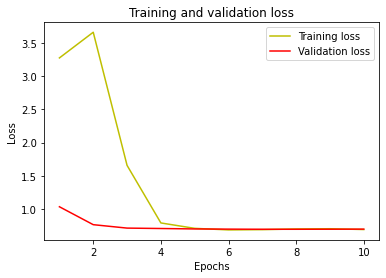

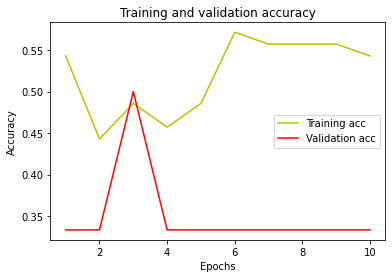

In [26]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


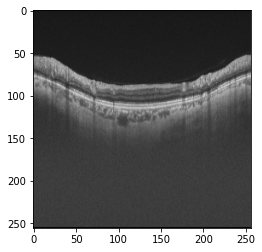

In [27]:
#Validate on an image
from keras.preprocessing import image
img = image.load_img('Image/0001.png', target_size=(SIZE,SIZE,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)

img = np.expand_dims(img, axis=0)
proba = model.predict(img) 


In [28]:
print("Predicted probability:",proba)

Predicted probability: [[0.52106243 0.4789376 ]]
